# Air Quality in Madrid in Year 2017

In [52]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
import statsmodels.formula.api as smf

In [53]:
data=pd.read_csv('madrid_2017.csv')

In [54]:
data.head()

,date,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2017-06-01 01:00:00,NaN,NaN,0.3,NaN,NaN,4.0,38.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,28079004
1,2017-06-01 01:00:00,0.6,NaN,0.3,0.4,0.08,3.0,39.0,NaN,71.0,22.0,9.0,7.0,1.4,2.9,28079008
2,2017-06-01 01:00:00,0.2,NaN,NaN,0.1,NaN,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,0.9,28079011
3,2017-06-01 01:00:00,NaN,NaN,0.2,NaN,NaN,1.0,9.0,NaN,91.0,NaN,NaN,NaN,NaN,NaN,28079016
4,2017-06-01 01:00:00,NaN,NaN,NaN,NaN,NaN,1.0,19.0,NaN,69.0,NaN,NaN,2.0,NaN,NaN,28079017


In [55]:
data.sort_values('date',inplace=True)
data.describe()

,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL,station
count,50201.000000,6410.000000,87001.000000,49973.000000,25472.000000,209065.000000,209065.000000,52818.000000,121398.000000,104141.000000,52023.000000,86803.000000,25472.000000,50117.000000,2.101200e+05
mean,0.595534,1.321218,0.363866,0.394819,0.127865,23.409189,41.580800,125.279621,48.326892,19.944863,9.947408,6.851802,1.396403,2.589977,2.807904e+07
std,0.774482,0.203652,0.262726,0.674253,0.094632,50.362967,32.374609,149.688490,34.616650,16.578637,7.241884,5.387921,0.263903,4.026134,1.761357e+01
min,0.100000,1.000000,0.100000,0.100000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.150000,0.100000,2.807900e+07
25%,0.200000,1.190000,0.200000,0.100000,0.080000,2.000000,17.000000,34.000000,17.000000,9.000000,5.000000,3.000000,1.240000,0.700000,2.807902e+07
50%,0.400000,1.280000,0.300000,0.200000,0.110000,6.000000,33.000000,73.000000,47.000000,16.000000,8.000000,5.000000,1.350000,1.400000,2.807904e+07
75%,0.700000,1.390000,0.400000,0.500000,0.160000,20.000000,59.000000,155.000000,73.000000,26.000000,13.000000,9.000000,1.490000,2.900000,2.807906e+07
max,19.600000,3.630000,4.900000,38.299999,4.400000,973.000000,349.000000,1798.000000,193.000000,308.000000,96.000000,98.000000,6.670000,91.000000,2.807906e+07


In [56]:
data.shape

(210120, 16)

There are more than one station in the dataset. For simplicity, only one station is considered. 
Will choose the one with maximum number of data provided. 

In [57]:
data_1 = data
data_1['no_na']=data_1.isnull().sum(axis=1)

In [58]:
data_1.head()

,date,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL,station,no_na
69620,2017-01-01 01:00:00,NaN,NaN,0.4,NaN,NaN,4.0,32.0,NaN,NaN,16.0,NaN,14.0,NaN,NaN,28079057,9
69621,2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,10.0,30.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,28079058,11
69623,2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,7.0,42.0,NaN,10.0,21.0,NaN,NaN,NaN,NaN,28079060,10
69619,2017-01-01 01:00:00,NaN,NaN,0.8,NaN,NaN,111.0,46.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,28079056,10
69618,2017-01-01 01:00:00,1.2,NaN,NaN,0.2,0.21,20.0,41.0,NaN,NaN,NaN,NaN,NaN,1.37,1.8,28079055,7


In [59]:
data_1.groupby(['station'])['no_na'].agg('sum')

station
28079004    85530
28079008    14292
28079011    77277
28079016    85547
28079017    85685
28079018    45220
28079024    14743
28079027    94236
28079035    77213
28079036    76866
28079038    51312
28079039    85728
28079040    85641
28079047    85659
28079048    85350
28079049    94309
28079050    85606
28079054    94261
28079055    50931
28079056    85633
28079057    76797
28079058    94246
28079059    94124
28079060    85515
Name: no_na, dtype: int64

Station no. 28079008 has minimum number of na. This station will be used for analysis.

In [60]:
data_ind=data[data['station']==28079008]
del data_ind['no_na']

In [61]:
data_ind.shape

(8760, 16)

In [62]:
data_ind.head()

,date,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL,station
69601,2017-01-01 01:00:00,1.1,NaN,0.2,0.2,0.17,19.0,53.0,NaN,7.0,33.0,29.0,12.0,1.86,1.6,28079008
69625,2017-01-01 02:00:00,1.4,NaN,0.2,0.3,0.20,52.0,64.0,NaN,5.0,51.0,45.0,13.0,1.91,2.0,28079008
69649,2017-01-01 03:00:00,1.5,NaN,0.2,0.4,0.17,49.0,62.0,NaN,5.0,50.0,43.0,12.0,1.87,2.5,28079008
69673,2017-01-01 04:00:00,1.2,NaN,0.2,0.3,0.15,29.0,55.0,NaN,6.0,33.0,28.0,10.0,1.86,1.9,28079008
69697,2017-01-01 05:00:00,1.0,NaN,0.1,0.2,0.14,18.0,50.0,NaN,8.0,25.0,21.0,9.0,1.85,1.5,28079008


In [63]:
data_ind.describe()

,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL,station
count,8599.000000,2204.000000,8713.000000,8598.000000,8703.000000,8705.000000,8705.000000,2202.000000,8616.000000,8666.000000,8673.000000,8681.000000,8703.000000,8580.000000,8760.0
mean,0.851901,1.423707,0.411615,0.501198,0.136058,33.653877,61.867318,166.676203,41.292247,19.379645,10.548138,8.328649,1.584924,3.388835,28079008.0
std,0.897954,0.213971,0.289763,0.843912,0.110245,58.416422,33.225762,172.156269,27.918263,13.989135,7.239910,3.727735,0.275871,4.448260,0.0
min,0.100000,1.180000,0.100000,0.100000,0.000000,1.000000,8.000000,11.000000,2.000000,1.000000,1.000000,1.000000,1.130000,0.100000,28079008.0
25%,0.400000,1.300000,0.300000,0.200000,0.090000,6.000000,38.000000,65.000000,17.000000,10.000000,5.000000,6.000000,1.410000,1.300000,28079008.0
50%,0.600000,1.390000,0.300000,0.300000,0.110000,14.000000,57.000000,110.000000,39.000000,16.000000,9.000000,8.000000,1.520000,2.100000,28079008.0
75%,1.000000,1.450000,0.500000,0.500000,0.160000,35.000000,79.000000,197.750000,60.000000,26.000000,14.000000,11.000000,1.690000,3.900000,28079008.0
max,19.600000,3.630000,4.900000,38.299999,4.400000,879.000000,349.000000,1681.000000,146.000000,161.000000,57.000000,35.000000,6.670000,84.800003,28079008.0


Let's focus on three main pollutants, NO, NO2 and PM25

Harm: (From Wikipedia)
NO: Causing acid rain 
NO2: Inflammation, reduced immune response, and may have effects on the heart
PM25: Associated with elevated risk of adverse pregnancy outcomes

In [64]:
data_ind2=data_ind[['date','NO','NO_2','PM25']]

Let's have a look on misisng data for each pollutant

In [65]:
data_ind2[data_ind2['NO'].isnull()]

,date,NO,NO_2,PM25
70537,2017-01-02 16:00:00,NaN,NaN,19.0
183385,2017-02-13 14:00:00,NaN,NaN,NaN
185689,2017-02-17 14:00:00,NaN,NaN,NaN
191425,2017-02-27 13:00:00,NaN,NaN,4.0
119761,2017-03-26 03:00:00,NaN,NaN,NaN
120673,2017-03-27 17:00:00,NaN,NaN,6.0
39985,2017-04-10 14:00:00,NaN,NaN,NaN
43921,2017-04-17 10:00:00,NaN,NaN,8.0
47977,2017-04-24 11:00:00,NaN,NaN,13.0
161497,2017-05-06 14:00:00,NaN,NaN,NaN


Apparently NO and NO2 are missing or present together. 

In [66]:
data_ind2[data_ind2['PM25'].isnull()]

,date,NO,NO_2,PM25
82537,2017-01-23 12:00:00,36.0,67.0,NaN
82561,2017-01-23 13:00:00,43.0,66.0,NaN
83641,2017-01-25 10:00:00,216.0,123.0,NaN
83665,2017-01-25 11:00:00,208.0,122.0,NaN
183385,2017-02-13 14:00:00,NaN,NaN,NaN
183409,2017-02-13 15:00:00,24.0,54.0,NaN
183433,2017-02-13 16:00:00,23.0,51.0,NaN
185689,2017-02-17 14:00:00,NaN,NaN,NaN
185713,2017-02-17 15:00:00,18.0,56.0,NaN
185737,2017-02-17 16:00:00,20.0,61.0,NaN


To handle missing data, using average mean to replace is one of options

In [67]:
data_ind2.fillna(data_ind2.mean(),inplace=True)

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [68]:
data_ind2.describe()

,NO,NO_2,PM25
count,8760.000000,8760.000000,8760.000000
mean,33.653877,61.867318,10.548138
std,58.232728,33.121281,7.203865
min,1.000000,8.000000,1.000000
25%,6.000000,38.000000,5.000000
50%,14.000000,57.000000,9.000000
75%,35.000000,79.000000,14.000000
max,879.000000,349.000000,57.000000


Time series analysis will be performed.Model will be Autoregressive Moving Average (ARMA). 

In [69]:
data_ind2=data_ind2.set_index('date')

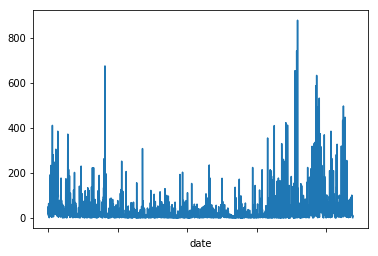

In [70]:
data_ind2['NO'].plot()

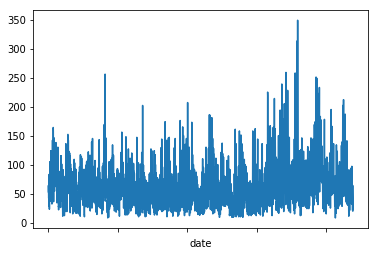

In [71]:
data_ind2['NO_2'].plot()

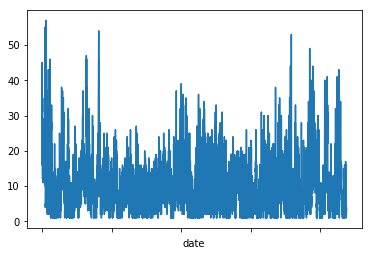

In [72]:
data_ind2['PM25'].plot()

In [73]:
NO=pd.Series(data_ind2['NO'],index=data_ind2.index)

In [74]:
arma_mod = sm.tsa.ARMA(NO, order=(2,2))
arma_res = arma_mod.fit(trend='nc', disp=-1)

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


In [75]:
print(arma_res.summary())

                              ARMA Model Results                              
Dep. Variable:                     NO   No. Observations:                 8760
Model:                     ARMA(2, 2)   Log Likelihood              -41856.162
Method:                       css-mle   S.D. of innovations             28.760
Date:                Fri, 07 Sep 2018   AIC                          83722.324
Time:                        15:31:45   BIC                          83757.714
Sample:                    01-01-2017   HQIC                         83734.382
                         - 01-01-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.NO       1.7089      0.007    252.103      0.000       1.696       1.722
ar.L2.NO      -0.7092      0.007   -105.278      0.000      -0.722      -0.696
ma.L1.NO      -0.6246      0.010    -59.936      0.0

In [77]:
NO2=pd.Series(data_ind2['NO_2'],index=data_ind2.index)
arma_mod = sm.tsa.ARMA(NO2, order=(2,2))
arma_res = arma_mod.fit(trend='nc', disp=-1)
print(arma_res.summary())

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                   NO_2   No. Observations:                 8760
Model:                     ARMA(2, 2)   Log Likelihood              -35392.211
Method:                       css-mle   S.D. of innovations             13.749
Date:                Fri, 07 Sep 2018   AIC                          70794.421
Time:                        15:31:50   BIC                          70829.811
Sample:                    01-01-2017   HQIC                         70806.480
                         - 01-01-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.NO_2     1.8029   3.27e-05   5.51e+04      0.000       1.803       1.803
ar.L2.NO_2    -0.8029   1.19e-05  -6.76e+04      0.000      -0.803      -0.803
ma.L1.NO_2    -0.5717      0.009    -63.961      0.0

In [78]:
PM25=pd.Series(data_ind2['PM25'],index=data_ind2.index)
arma_mod = sm.tsa.ARMA(PM25, order=(2,2))
arma_res = arma_mod.fit(trend='nc', disp=-1)
print(arma_res.summary())

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                   PM25   No. Observations:                 8760
Model:                     ARMA(2, 2)   Log Likelihood              -25489.240
Method:                       css-mle   S.D. of innovations              4.440
Date:                Fri, 07 Sep 2018   AIC                          50988.481
Time:                        15:31:54   BIC                          51023.870
Sample:                    01-01-2017   HQIC                         51000.539
                         - 01-01-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.PM25     1.6261      0.020     81.439      0.000       1.587       1.665
ar.L2.PM25    -0.6268      0.020    -31.578      0.000      -0.666      -0.588
ma.L1.PM25    -0.9018      0.024    -38.032      0.0

Appearantly both three pollutants are all autocorrelative. 